In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
#%matplotlib inline
import numpy as np
#import IPython.display as ipd
import librosa
import librosa.display
import scipy
import sklearn
import pandas as pd
import base64
import wave
import os
import glob
import sklearn.externals
import joblib
from scipy.io.wavfile import read as read_wav
from wave import open as open_wave
from pydub import AudioSegment

C:\Users\Ajinkya\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
C:\Users\Ajinkya\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
AJ_audio = "C:/Users/Ajinkya/Downloads/Voice Authentication Project/AJ_mix/"

imposter_Audio = "C:/Users/Ajinkya/Downloads/Voice Authentication Project/Imposter/"

imposter_audio2 = "C:/Users/Ajinkya/Downloads/Voice Authentication Project/Ruby/"

imposter_audio3 = "C:/Users/Ajinkya/Downloads/Voice Authentication Project/Twinkle/"

imposter_audio4 = "C:/Users/Ajinkya/Downloads/Voice Authentication Project/Prakat/"

In [3]:
wavs = []
audio_list1 = []
filename = ''
for filename in glob.glob("C:/Users/Ajinkya/Downloads/Voice Authentication Project/AJ_mix/*.wav"):
    audio_list1.append(filename)
    wavs.append(read_wav(filename))

wavs1 = []
audio_list2 = []
filename = ''
for filename in glob.glob("C:/Users/Ajinkya/Downloads/Voice Authentication Project/Imposter/*.wav"):
    audio_list2.append(filename)
    wavs1.append(read_wav(filename))
    
wavs2 = []
audio_list3 = []
filename = ''
for filename in glob.glob("C:/Users/Ajinkya/Downloads/Voice Authentication Project/Ruby/*.wav"):
    audio_list3.append(filename)
    wavs2.append(read_wav(filename))

wavs3 = []
audio_list4 = []
filename = ''
for filename in glob.glob("C:/Users/Ajinkya/Downloads/Voice Authentication Project/Twinkle/*.wav"):
    audio_list4.append(filename)
    wavs3.append(read_wav(filename))
    
wavs4 = []
audio_list5 = []
filename = ''
for filename in glob.glob("C:/Users/Ajinkya/Downloads/Voice Authentication Project/Prakat/*.wav"):
    audio_list5.append(filename)
    wavs4.append(read_wav(filename))

<ipython-input-3-c218a47ffa8c>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  wavs.append(read_wav(filename))


In [4]:
data=np.zeros([280,21]);
featuredf  = pd.DataFrame(data, columns = ['User', 'Average', 'std', 'zcr', 'centroid', 'rollof', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14','label'])
featuredf.iloc[0:120,0]='AJ';
featuredf.iloc[120:160,0]='Imposter';
featuredf.iloc[160:200,0]='Imposter2';
featuredf.iloc[200:240,0]='Imposter3';
featuredf.iloc[240:280,0]='Imposter4';
featuredf.iloc[0:120,-1]=1;
featuredf.iloc[120:160,-1]=0;
featuredf.iloc[160:200,-1]=0;
featuredf.iloc[200:240,-1]=0;
featuredf.iloc[240:280,-1]=0;

In [27]:
#AJ's sampling rate
AJ = os.chdir(AJ_audio) # change to the file directory
sr, x1=read_wav("AJ (1).wav") # enter your filename
sr

48000

In [6]:
#Imposter's sampling rate
Imposter1 = os.chdir(imposter_Audio) # change to the file directory
sr1, x1=read_wav("Imposter (1).wav") # enter your filename
sr1

44100

In [7]:
#Imposter 2's sampling rate
Imposter1 = os.chdir(imposter_audio2) # change to the file directory
sr2, x2=read_wav("Ruby (1).wav") # enter your filename
sr2

48000

In [8]:
#Imposter 3's sampling rate
Imposter1 = os.chdir(imposter_audio3) # change to the file directory
sr3, x3=read_wav("Twinkle (1).wav") # enter your filename
sr3

44100

In [9]:
#Imposter 4's sampling rate
Imposter1 = os.chdir(imposter_audio4) # change to the file directory
sr4, x4=read_wav("Prakat (1).wav") # enter your filename
sr4

48000

In [10]:
def normalize(x1, axis=0):
    return sklearn.preprocessing.minmax_scale(x1, axis=axis)

# AJ - Feature Extraction

In [11]:
# AJ - Zooming in
ind=0;
for audio in audio_list1:
    data,sample_rate=librosa.load(audio)
    zero_crossings = librosa.zero_crossings(data, pad=False) 
    spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
    mfccs = librosa.feature.mfcc(data, sr=sr,n_mfcc=14)
    featuredf.iloc[ind,1]=np.mean(data)
    featuredf.iloc[ind,2]=np.std(data)
#Spectral Centroid
    featuredf.iloc[ind,4]=np.mean(normalize(spectral_centroids))
#Zero Crossings
    featuredf.iloc[ind,3]=sum(zero_crossings)
#Spectral Rolloff
    featuredf.iloc[ind,5]=np.mean(normalize(spectral_rolloff))
#mfcc
    featuredf.iloc[ind,6:20]=np.mean(mfccs,1)
    ind=ind+1;

# Imposter1 - Feature Extraction

In [12]:
#Imposter - Zooming in
ind=120;
for audio1 in audio_list2:
    data1,sample_rate1=librosa.load(audio1)
    featuredf.iloc[ind,1]=np.mean(data1)
    featuredf.iloc[ind,2]=np.std(data1)  
    zero_crossings1 = librosa.zero_crossings(data1, pad=False)
    spectral_centroids1 = librosa.feature.spectral_centroid(data1, sr=sr1)[0]
    spectral_rolloff1 = librosa.feature.spectral_rolloff(data1+0.01, sr=sr1)[0]
    mfccs1 = librosa.feature.mfcc(data1, sr=sr1,n_mfcc=14)
#Spectral Centroid
    featuredf.iloc[ind,4]=np.mean(normalize(spectral_centroids1))
#Zero Crossings
    featuredf.iloc[ind,3]=sum(zero_crossings1)
#Spectral Rolloff
    featuredf.iloc[ind,5]=np.mean(normalize(spectral_rolloff1))
#mfcc
    featuredf.iloc[ind,6:20]=np.mean(mfccs1,1)
    ind=ind+1;

# Imposter2 - Feature Extraction

In [13]:
#Imposter2 - Zooming in
ind=160;
for audio2 in audio_list3:
    data2,sample_rate2=librosa.load(audio2)
    featuredf.iloc[ind,1]=np.mean(data2)
    featuredf.iloc[ind,2]=np.std(data2)  
    zero_crossings2 = librosa.zero_crossings(data2, pad=False)
    spectral_centroids2 = librosa.feature.spectral_centroid(data2, sr=sr2)[0]
    spectral_rolloff2 = librosa.feature.spectral_rolloff(data2+0.01, sr=sr2)[0]
    mfccs2 = librosa.feature.mfcc(data2, sr=sr2,n_mfcc=14)
#Spectral Centroid
    featuredf.iloc[ind,4]=np.mean(normalize(spectral_centroids2))
#Zero Crossings
    featuredf.iloc[ind,3]=sum(zero_crossings2)
#Spectral Rolloff
    featuredf.iloc[ind,5]=np.mean(normalize(spectral_rolloff2))
#mfcc
    featuredf.iloc[ind,6:20]=np.mean(mfccs2,1)
    ind=ind+1;

# Imposter3- Feature Extraction

In [14]:
#Imposter3 - Zooming in
ind=200;
for audio3 in audio_list4:
    data3,sample_rate3=librosa.load(audio3)
    featuredf.iloc[ind,1]=np.mean(data3)
    featuredf.iloc[ind,2]=np.std(data3)  
    zero_crossings3 = librosa.zero_crossings(data3, pad=False)
    spectral_centroids3 = librosa.feature.spectral_centroid(data3, sr=sr3)[0]
    spectral_rolloff3 = librosa.feature.spectral_rolloff(data3+0.01, sr=sr3)[0]
    mfccs3 = librosa.feature.mfcc(data3, sr=sr3,n_mfcc=14)
#Spectral Centroid
    featuredf.iloc[ind,4]=np.mean(normalize(spectral_centroids3))
#Zero Crossings
    featuredf.iloc[ind,3]=sum(zero_crossings3)
#Spectral Rolloff
    featuredf.iloc[ind,5]=np.mean(normalize(spectral_rolloff3))
#mfcc
    featuredf.iloc[ind,6:20]=np.mean(mfccs3,1)
    ind=ind+1;

# Imposter4 - Feature Extraction

In [15]:
#Imposter3 - Zooming in
ind=240;
for audio4 in audio_list5:
    data4,sample_rate4=librosa.load(audio4)
    featuredf.iloc[ind,1]=np.mean(data4)
    featuredf.iloc[ind,2]=np.std(data4)  
    zero_crossings4 = librosa.zero_crossings(data4, pad=False)
    spectral_centroids4 = librosa.feature.spectral_centroid(data4, sr=sr4)[0]
    spectral_rolloff4 = librosa.feature.spectral_rolloff(data4+0.01, sr=sr4)[0]
    mfccs4 = librosa.feature.mfcc(data4, sr=sr4,n_mfcc=14)
#Spectral Centroid
    featuredf.iloc[ind,4]=np.mean(normalize(spectral_centroids4))
#Zero Crossings
    featuredf.iloc[ind,3]=sum(zero_crossings4)
#Spectral Rolloff
    featuredf.iloc[ind,5]=np.mean(normalize(spectral_rolloff4))
#mfcc
    featuredf.iloc[ind,6:20]=np.mean(mfccs4,1)
    ind=ind+1;

In [16]:
featuredf.to_csv("C:/Users/Ajinkya/Downloads/Voice Authentication Project/Feature Extraction samples AJ_mix.csv", header=True, index=False)  

# Classification

In [17]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
# Keras specific
import keras
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import classification_report;
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [18]:
y=featuredf.label
x=featuredf.drop(['label','User'],axis=1)
print(x.shape)
print(y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(280, 19)
(280,)
(224, 19) (224,)
(56, 19) (56,)


# Logistic Regression

ACC:1.000
AUC:1.000

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        33
         1.0       1.00      1.00      1.00        23

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



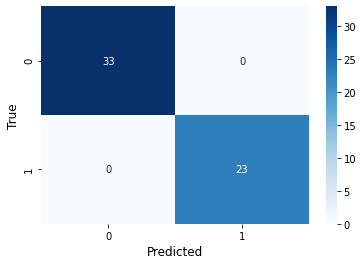

In [19]:
logreg = LogisticRegression();
logreg.fit(x_train,y_train);
y_pred = logreg.predict(x_test);
cf_matrix = confusion_matrix(y_test, y_pred);
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(classification_report(y_test, y_pred))

# SVM

ACC:1.000
AUC:1.000

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        33
         1.0       1.00      1.00      1.00        23

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



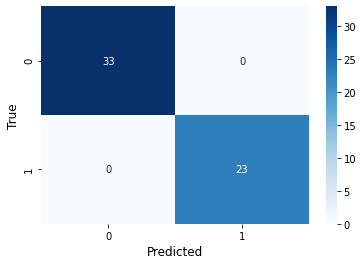

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
clSvm = SVC(kernel = 'linear') 
p = {'kernel':('linear',), 'C':[0.001,0.1,1,10]}
clSvm= GridSearchCV(clSvm, p,cv = KFold(4))
clSvm.fit(x_train, y_train )
y_pred = clSvm.predict(x_test)
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))

cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(classification_report(y_test, y_pred))

# Naivebayes

ACC:0.875
AUC:0.861

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        33
         1.0       0.90      0.78      0.84        23

    accuracy                           0.88        56
   macro avg       0.88      0.86      0.87        56
weighted avg       0.88      0.88      0.87        56



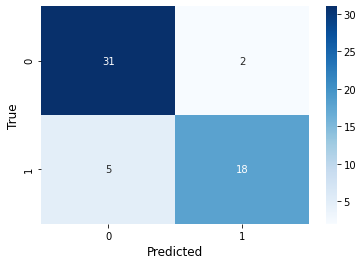

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

print(classification_report(y_test, y_pred))

# Decision  Tree

ACC:0.946
AUC:0.941

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        33
         1.0       0.95      0.91      0.93        23

    accuracy                           0.95        56
   macro avg       0.95      0.94      0.94        56
weighted avg       0.95      0.95      0.95        56



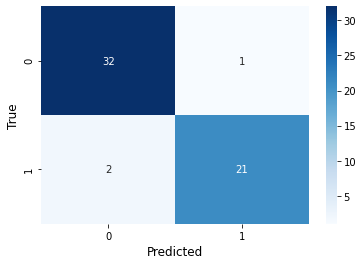

In [22]:
from sklearn.tree import DecisionTreeClassifier;
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

print(classification_report(y_test, y_pred))

# KNN

ACC:1.000
AUC:1.000

Test confusion_matrix
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        33
         1.0       1.00      1.00      1.00        23

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



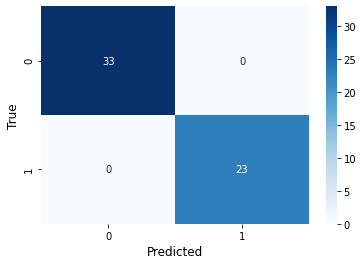

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(n_neighbors=5)
knnclf.fit(x_train, y_train)
y_pred = knnclf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print('ACC:'+ "{0:.3f}".format(accuracy_score(y_test, y_pred)))
print('AUC:'+"{0:.3f}".format(roc_auc_score(y_test, y_pred)))
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

print(classification_report(y_test, y_pred))

# Save and Load Model Using joblib

In [24]:
filename='logreg_model.sav'
joblib.dump(logreg, filename)

['logreg_model.sav']

In [25]:
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

1.0
